## Fandango's Movie Ratings: Should We Trust it Now?
[*Fandago*](https://www.fandango.com/) is an American ticketing company that sells movie tickets via their website as well as through their mobile app, as reported by [*Wikipedia*](https://en.wikipedia.org/wiki/Fandango_(company)). 
In October 2015, a data journalist named Walt Hickey published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presents strong evidence to suggest that Fandango's rating system was biased and dishonest. In particular he found out a significant discrepancy between the number of stars, used in [Fandago](https://www.fandango.it) website to indicate the movie rate, and the actual rating, indicated in the HTML of the page. 
After this analysis Fandango's officials replied that the biased rounding off was caused by a bug and that they were going to fix it. Nowadays it is not possible to evaluate whether the bag has been fixed or not since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

The **aim of this project** is to investigate determine whether there has been any change in Fandango's rating system after Hickey's analysis. We are going to do it by comparing a datasets related to the film ratings of Fandango and other popular websites before and after Hickey's analysis. 

### Summary of the Results

Our analysis suggests that **there exist a variation of the film ratings** in Fandango between these two years and we reported that there was a **descrease in the mean ratings value in 2016 compared to the one in 2015**, however it is possible to notice that **Fandango mean rating value is always higher than the one of other popular websites**.

## Datasets evaluation

Let us first import the needed libraries, as follows:

In [1]:
# Import
import os
import pandas as pd
import json
import matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In order to evaluate whether the Hickey's analysis brought Fandango website to revise their grading system we can compare Fandago's rating system before (available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango)) and after Hickey's analysis (available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17)). 

In [2]:
# Read Datasets
previous_rating = pd.read_csv('fandango_score_comparison.csv')
after_rating = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
# Check dataframe
previous_rating.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


As one can find in the correspondent Github repository, the 22 columns of *previous_rating* dataframe store numbers (*int64* and *float64*) and the film title. The same can be said for the *after_rating* dataframe. 

In [4]:
#Check dataframe
after_rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


For our analysis we can select specific columns of interest mainly related to the title of film under analysis, the corresponding rating reported in Fandango webpage and in other two famous websites for film ratings, which are [IMDB](https://www.imdb.com) and [RottenTomatoes](https://www.rottentomatoes.com); moreover in the *previous_rating* dataframe the 'true' rating value is included in the analysis (different from the 'reported' one) and in the *after_rating* dataframe the year related to the film is added.

In [5]:
# Select the columns under analysis
previous= previous_rating[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference', 'IMDB_norm', 'RT_user_norm']].copy()
after = after_rating[['movie', 'year', 'fandango', 'n_imdb', 'n_audience']].copy()

In *after_rating* dataframe the column 'n_audience' refer to the Rotten Tomatoes user score normalized to a 0-5 scale. So in order to make it clearer we can change the columns name

In [6]:
after.rename(columns = {'n_audience':'rottenTomatoes_2016'}, inplace = True)

Moreover other columns names can be changed for simplicity. 

In [7]:
after.rename(columns = {'n_imdb':'imdb_2016', 'fandango':'fandango_2016'}, inplace = True)
previous.rename(columns = {'Fandango_Stars':'fandango_2015', 'IMDB_norm':'imdb_2015', 'RT_user_norm':'rottenTomatoes_2015'}, inplace = True)

## Considerations on the data

The population of interest for our goal is represented by all the film ratings presented in Fandago. Since we want to make a comparison on two specific period (before and after Hickey's analysis), we need to sample film ratings which are related to those periods and that are common to the websites we want to compare. In the datasets we have the sampling of film to consider was not done in a random way but according to specific criterions (significant number of votes, the fact that the evaluated ratings belong to films analyzed in all the websites under analysis and that the films belong to specific years and not in general to an extensive period before and after Hickey's analysis). This means that the resulting samples are very unlikely to be representative of the population we're interested in describing since thay can be probably subjected to temporal trends.

Since it would be very hard to collect new samples previous to Hickey's analysis we could place some limitations in the analysis we want to conduct. In particular we can **constrain our analysis only on the periods 2015-2016, without inferring to the entire periods before and after Hickey's paper. **

### Isolating films belonging to the years 2015-1026

In [8]:
# Define a function useful for processing dataframes
def ExtractYear(s):
    return s[s.find("(")+1:s.find(")")]

In [9]:
# Let's check whether all the movies analyzed in "previous" 
#dataframe are related to the period 2015
previous['FILM_year'] = previous['FILM'].apply(ExtractYear)
ratings_2015 = previous[previous.FILM_year == '2015']

In [10]:
# Let's do the same thing for after
ratings_2016 = after[after['year'] == 2016]

In [11]:
ratings_2015.head()

,FILM,fandango_2015,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,imdb_2015,rottenTomatoes_2015,FILM_year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.90,4.3,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,3.55,4.0,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,3.90,4.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2.70,4.2,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2.55,1.4,2015


In [12]:
ratings_2016.head()

,movie,year,fandango_2016,imdb_2016,rottenTomatoes_2016
0,10 Cloverfield Lane,2016,3.5,3.60,3.95
1,13 Hours,2016,4.5,3.65,4.15
2,A Cure for Wellness,2016,3.0,3.30,2.35
4,A Hologram for the King,2016,3.0,3.05,2.85
5,A Monster Calls,2016,4.0,3.75,4.20


## Samples consistency

In order to be consistent the two datasets (the one of 2016 and the one of 2015) should contain film ratings released by the same number of users. In the case of the *ratings_2015* dataset the films collected were the ones reviewed by at least 30 fan; however in the *ratings_2016* dataframe such a detail is not specify: it is just indicated that the collected movies were the most popular ones. We could in principle double check this by randomly sampling 10 films of *ratings_2016* dataframe and manually check in *fandango* webpage to see whether the votes obtained by the selected film is at least 30. 

In [13]:
random_films = ratings_2016.sample(n=10, random_state = 1).movie.to_frame().reset_index()

In [14]:
random_films.drop(['index'], axis=1, inplace= True)

From Fandango [webpage](https://www.fandango.com/) we can easily associate for each randomly sampled film of 2016 the corresponding number of users that rated the film.

In [15]:
random_films ['n_votes'] = [335, 2245, 6218,383, 4011, 1818, 44750, 4086, 3473, 4843]

In [16]:
random_films

,movie,n_votes
0,Collide,335
1,Ice Age: Collision Course,2245
2,Now You See Me 2,6218
3,The Disappointments Room,383
4,Kubo and the Two Strings,4011
5,Pride and Prejudice and Zombies,1818
6,Deadpool,44750
7,Money Monster,4086
8,War Dogs,3473
9,Miracles from Heaven,4843


As you can see the number of users that rated each of the 10 randomly sample films were more than 30.

## How the Ratings Changed from 2015 to 2016

In order to determine whether there is any differences between Fandago's rating of popular movies in 2015 and 2016 (before and after Hickey's analysis), we can start by just looking at the kernel density plot of the ratings.

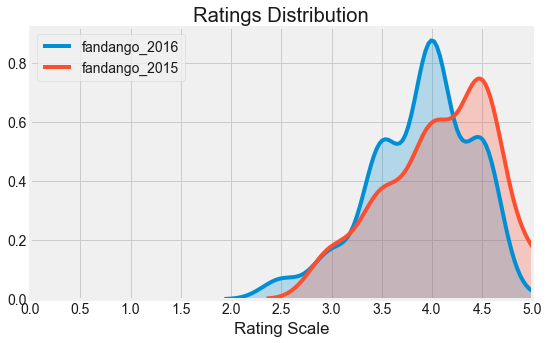

In [17]:
# Compute the kernel density plot
plt.figure(figsize=(9,5))
plt.style.use('fivethirtyeight')
sns.kdeplot(ratings_2016["fandango_2016"], shade = True)
sns.kdeplot(ratings_2015["fandango_2015"], shade = True)
plt.xlabel('Rating Scale')
plt.xticks(np.arange(0, 6, step=0.5))
plt.xlim([0, 5])
plt.title('Ratings Distribution')
sns.set(font_scale=2)
plt.show()


The distributions of ratings in the two time periods (2015-2016) show that before Hickey's analysis, in particular in year 2015, Fandango's film rating was slightly higher that the one after such an analysis, in particular in year 2016. In fact in 2016 most of the films had a vote of 4.0 (in a scale of [0,5]) while in 2015 a fewer number of the film rating was around 4.0 while most of the films were rating 4.5. Also the minimum rate changes from 2015 to 2016: before Hickey's analysis no film received a vote less than 2.5 while after the analysis this lower boundary decreases to 2.0. 

In both cases the same number of films got a rate of 3.0.

We could go more indepth by analyzing the frequency distribution table of the film ratings, as a percentage of the total number of films rated in each dataframe.

In [18]:
print('Frequency distribution table for 2016:   ')
print(ratings_2016["fandango_2016"].value_counts(normalize = True))

Frequency distribution table for 2016:   
4.0    0.403141
4.5    0.246073
3.5    0.240838
3.0    0.073298
2.5    0.031414
5.0    0.005236
Name: fandango_2016, dtype: float64


In [19]:
print('Frequency distribution table for 2015:   ')
print(ratings_2015["fandango_2015"].value_counts(normalize = True))

Frequency distribution table for 2015:   
4.5    0.379845
4.0    0.286822
3.5    0.178295
3.0    0.085271
5.0    0.069767
Name: fandango_2015, dtype: float64


As expected frequency tables confirm what we found through the kernel density plots. Indeed from the tables one can find that the maximum percentage of films (38%) in 2015 had a rating value of 4.5, while in 2016 the maximum percentage of films (40%) had a rating value of 4.0. Moreover in 2016 we can still find some films associated to a rating value of 2.5, while in 2015 the minimum rating value is 3.0. 
If with the frequency distribution tables, we could confirm some observations made with the kernel density plot, in particular that there is a difference between the two distributions, these tables do not clarify the direction of such a difference. 

We could compute the mean, median and mode to say something about such a direction.

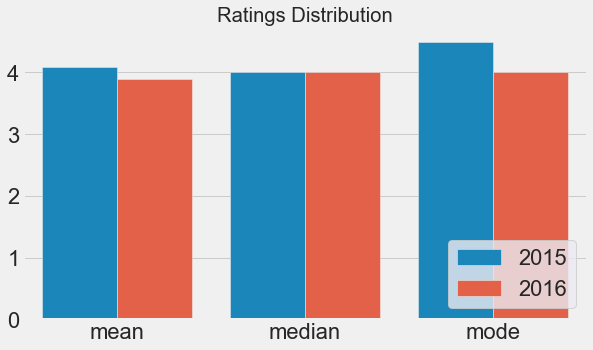

In [20]:
# Compute mean, median and mode
statistics = pd.DataFrame(columns=['stat', 'value', 'year'])
statistics['value'] = [ratings_2015["fandango_2015"].mean(), ratings_2016["fandango_2016"].mean(), ratings_2015["fandango_2015"].median(),ratings_2016["fandango_2016"].median(),ratings_2015["fandango_2015"].mode().values[0], ratings_2016["fandango_2016"].mode().values[0] ]
statistics['stat'] = ['mean', 'mean', 'median', 'median', 'mode', 'mode'] 
statistics['year'] = [2015, 2016,2015, 2016,2015, 2016] 
# Bar plot to compare the computed statistics
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,5))
plt.style.use('fivethirtyeight')
sns.barplot(x="stat", y="value", hue="year", data=statistics)
plt.title('Ratings Distribution')
plt.xlabel('')
plt.ylabel('')
sns.set(font_scale=2)
plt.legend(loc = 'lower right')
plt.show()


Statistics show better the direction of film rating difference from 2015 to 2016. It is indded possible to notice that the mean value of fim rating tend to slightly decrease in 2016 as well as the mode. Finally the median look the same in both years.

## Comparison among Different Websites for Film Ratings

The *after_rating* dataset contains movie ratings data for 214 of the most popular movies reported by IMDB, Rotten Tomatoes, Metacritic and Fandago (with a significant number of votes) released in 2016 and 2017. In the *previous_rating* dataset we can find films rating related of the year 2014 (that is before Hickey's analysis), reported by the same webpages. 
**An interesting analysis would be to evaluate the differences between Fandago ratings and the ones reported by the other websites before and after Hickey's analysis. In this way we could compare how these differences change from one period to the other.**
What we expect, according to the preliminary work of Hickey, is that first of all the *intra-period* differences (which we can define as the differences between Fandago ratings and the other websites ratings) decrease going from the period before Hickey's analysis to the one after. More so, we expect the *inter-period* differences (which we can define as the difference of the differences in the period before and after Hickey's analysis) to be statistically significant. 

In [21]:
# Compute mean and std for each websites's movie ratings in 2015
web_sites = ['Fandango', 'IMDB', 'RottenTomatoes']
x_pos = np.arange(len(web_sites))
means = [ratings_2015['fandango_2015'].mean(), ratings_2015['imdb_2015'].mean(), ratings_2015['rottenTomatoes_2015'].mean()]
stds = [ratings_2015['fandango_2015'].std(), ratings_2015['imdb_2015'].std(), ratings_2015['rottenTomatoes_2015'].std()]

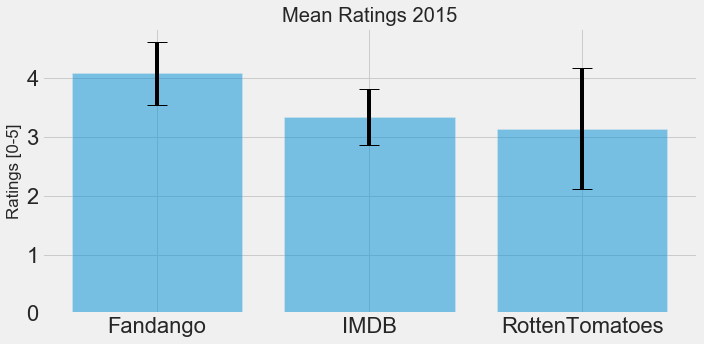

In [22]:
# Build the plot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Ratings [0-5]')
ax.set_xticks(x_pos)
ax.set_xticklabels(web_sites)
ax.set_title('Mean Ratings 2015')
ax.yaxis.grid(True)

# show
plt.tight_layout()
plt.show()

In [23]:
# Compute mean and std for each websites's movie ratings in 2016
web_sites = ['Fandango', 'IMDB', 'RottenTomatoes']
x_pos = np.arange(len(web_sites))
means = [ratings_2016['fandango_2016'].mean(), ratings_2016['imdb_2016'].mean(), ratings_2016['rottenTomatoes_2016'].mean()]
stds = [ratings_2016['fandango_2016'].std(), ratings_2016['imdb_2016'].std(), ratings_2016['rottenTomatoes_2016'].std()]

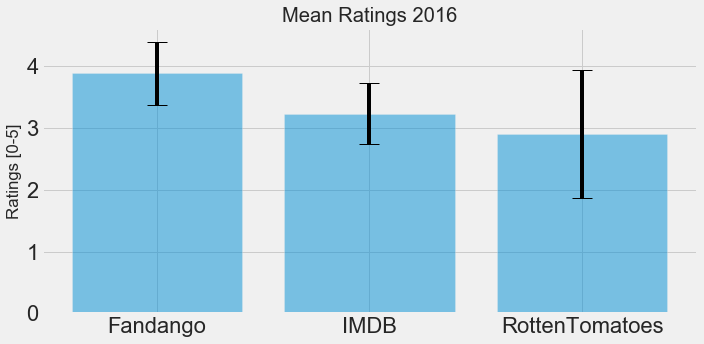

In [24]:
# Build the plot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Ratings [0-5]')
ax.set_xticks(x_pos)
ax.set_xticklabels(web_sites)
ax.set_title('Mean Ratings 2016')
ax.yaxis.grid(True)

# show
plt.tight_layout()
plt.show()

As you can see, although the Fandango mean film ratings decreases from 2015 to 2016, it is still on average bigger than the ones reported by the other two websites.  

## Conclusion

The aim of this project was to investigate whether there has been any changes in Fandango's rating system after Hickey's analysis, in particular between the years 2015 and 2016. Through our analysis we showed that **there exist a variation of the film ratings** in Fandango between these two years and we reported that there was a **descrease in the mean ratings value in 2016 compared to the one in 2015**. This decrease may be related to the work of Hickey and to the fixing of the bug Fandango administrators found in the rating system. 
Although there has been such a decrease if one compare the mean film rating of Fandango with the ones of other popular websites, such as IMDB and RottenTomatoes, it is possible to notice that **Fandango mean rating value is always higher than the other ones**, that among each others are comparable. A deeper investigation may help understanding the reason behind these observation.